In [1]:
!pip uninstall -y awkward

#If you have awkward.version > 1.x uninstall
#

In [2]:
!pip install awkward==1.8.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
coffea 0.7.21 requires awkward<2,>=1.10.3, but you have awkward 1.8.0 which is incompatible.


In [3]:
import awkward as ak
import pandas as pd
import numpy as np
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
hep.style.use("CMS")

In [4]:
#Set the benchmark to analyze
#BM = "bkg"
BM = 'toy'

#Set the number of jets you want to take into account in your analysis
n_jets = 4
n_lep = 4

if BM == 1:
    fname = "/cms/mc/MG5_aMC_v3_1_1/pp2monojet_tjj/Events/run_02/tag_1_delphes_events.root"
    x_sec = 28.85 * 1e-12
elif BM == 2:
    fname = "/cms/mc/MG5_aMC_v3_1_1/pp2monojet_tjj/Events/run_03/tag_1_delphes_events.root"
    x_sec = 0.004521995016 * 1e-12
elif BM == 'toy':
    fname = "/home/tomas/Documents/MG5_aMC_v2_9_15/MonoJet_DM_UdeA/Events/run_01/tag_1_delphes_events.root"
    x_sec = 28.85 * 1e-12
elif BM == "bkg":
    fname = "/cms/mc/MG5_aMC_v3_1_1/Pp2DY_Plus_Jets_Nu/Events/run_05/tag_1_delphes_events.root"
    x_sec = 110.1 * 1e-12

tree_test = dm.Converter(fname)
tree_test.generate(jet_elements = n_jets, e_mu_elements = n_lep)
df = tree_test.df

In [5]:
print(df.shape[0])
print(df.columns)
df.head()

100000
Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'jet_tautag0', 'jet_tautag1',
       'jet_tautag2', 'jet_tautag3', 'muon_pt0', 'muon_pt1', 'muon_pt2',
       'muon_pt3', 'muon_eta0', 'muon_eta1', 'muon_eta2', 'muon_eta3',
       'muon_phi0', 'muon_phi1', 'muon_phi2', 'muon_phi3', 'muon_charge0',
       'muon_charge1', 'muon_charge2', 'muon_charge3', 'electron_pt0',
       'electron_pt1', 'electron_pt2', 'electron_pt3', 'electron_eta0',
       'electron_eta1', 'electron_eta2', 'electron_eta3', 'electron_phi0',
       'electron_phi1', 'electron_phi2', 'electron_phi3', 'electron_charge0',
       'electron_charge1', 'electron_charge2', 'electron_charge3',
       'missinget_met', 'missinget_phi'],
      dtype='object')


,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3,missinget_met,missinget_phi
0,288.391205,187.987137,65.003792,56.46899,0.601846,-0.520716,-1.294010,-0.380898,1.087170,-1.369822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.783646,-3.029542
1,22.854240,NaN,NaN,NaN,2.444877,NaN,NaN,NaN,-2.634714,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.213589,1.168014
2,47.797470,NaN,NaN,NaN,2.307834,NaN,NaN,NaN,-2.278055,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672722,0.707939
3,147.066574,129.172363,40.886440,NaN,0.731830,-0.990786,0.085506,NaN,-2.447855,0.913900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.436737,-0.288472
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.518309,2.743797


# Cutting

In [6]:
#Cut p_T^{miss} > 200 GeV
df_cut = df[df['missinget_met'] > 200]

In [7]:
#Cut p_T(j0) > 100 GeV
df_cut = df_cut[df_cut['jet_pt0'] > 100]

In [8]:
#Cut eta(j0) > 2.5 
df_cut = df_cut[np.abs(df_cut['jet_eta0']) < 2.5]

In [9]:
#Cut HT > 110 GeV
#HT := sum(jet_pt) over all the jets per event
#Sumar solo por los que tengan mayor pt que 20
df_cut = df_cut[np.sum(df_cut[[f"jet_pt{i}" for i in range(n_jets)]], axis = 1) > 110]
df_cut

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3,missinget_met,missinget_phi
6,196.063171,105.576622,81.976669,78.635681,1.012423,0.992535,-3.720496,-0.448280,1.314824,0.317460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.537323,-2.073287
9,126.901321,71.299812,57.341599,NaN,-0.037826,-1.624594,-0.479165,NaN,2.149158,2.000330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.391144,-0.974549
27,307.993896,NaN,NaN,NaN,0.591825,NaN,NaN,NaN,1.122625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297.170593,-2.046365
38,544.995361,23.859896,NaN,NaN,-0.315043,-1.584603,NaN,NaN,-1.225793,-2.535308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542.183105,1.891712
60,225.708099,85.162727,66.549667,46.811176,1.036182,-0.741889,0.461221,0.347102,1.646572,2.947400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.545654,-1.557914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,205.519333,146.113663,42.892838,26.464922,-0.389155,0.760745,0.348971,-0.876598,0.842938,1.581903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.662384,-1.936040
99984,281.095245,102.095345,80.809235,73.631996,0.747258,0.240870,-0.580673,-1.314865,1.401202,0.697760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.476349,-2.184563
99988,412.267944,54.587402,NaN,NaN,-0.584343,0.215022,NaN,NaN,-1.549170,-0.951526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.474152,1.647743
99989,144.154404,108.417915,59.060738,NaN,-0.161556,-0.189079,2.455083,NaN,-1.353546,-0.490684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.455673,1.980006


In [10]:
df_cut.apply(dm.veto_tag, axis = 1, args = ["b", 4])
#veto_tag(df_cut, "b", n_jets = 4)

6        0
9        0
27       0
38       0
60       1
        ..
99979    1
99984    0
99988    0
99989    0
99991    0
Length: 18210, dtype: int64

In [11]:
df_cut['n_taus'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["tau", n_jets])
df_cut['n_bs'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["b", n_jets])
df_cut['n_ele'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["electron", n_lep])
df_cut['n_mu'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["muon", n_lep])
#df_cut['b_pt'] = df_cut.apply(dm.pt_tag_extractor, args=('b', n_jets), axis = 1)

In [12]:
df_cut = df_cut[df_cut['n_taus'] < 1]
df_cut = df_cut[df_cut['n_bs'] < 1]
df_cut = df_cut[df_cut['n_ele'] < 1]
df_cut = df_cut[df_cut['n_mu'] < 1]

Corregir la función anterior: Contar el número de Taus por evento con las condiciones, si hay al menos uno de ellos, quitar el evento.

In [13]:
#Cut over tau's pt
#df_cut = df_cut[(df_cut.tau_pt.isna()) 
#                | (df_cut.tau_pt < 18)]
#df_cut = df_cut[(df_cut.tau_eta.isna()) 
#                | (np.abs(df_cut.tau_eta) > 2.5)]

#Veto over charged leptons pt and pseudorapidity
#df_cut = df_cut[(df_cut.electron_pt0.isna()) 
#                | (df_cut.electron_pt0 < 10)]
#df_cut = df_cut[(df_cut.electron_eta0.isna()) 
#                | (np.abs(df_cut.electron_eta0) > 2.5)]
#df_cut = df_cut[(df_cut.muon_pt0.isna()) 
#                | (df_cut.muon_pt0 < 10)]
#df_cut = df_cut[(df_cut.muon_eta0.isna()) 
#                | (np.abs(df_cut.muon_eta0) > 2.4)]

#Veto over b-jets
#df_cut = df_cut[(df_cut.b_pt.isna()) 
#                | (df_cut.b_pt < 15)]
df_cut

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_charge0,electron_charge1,electron_charge2,electron_charge3,missinget_met,missinget_phi,n_taus,n_bs,n_ele,n_mu
6,196.063171,105.576622,81.976669,78.635681,1.012423,0.992535,-3.720496,-0.448280,1.314824,0.317460,...,NaN,NaN,NaN,NaN,293.537323,-2.073287,0,0,0,0
9,126.901321,71.299812,57.341599,NaN,-0.037826,-1.624594,-0.479165,NaN,2.149158,2.000330,...,NaN,NaN,NaN,NaN,260.391144,-0.974549,0,0,0,0
27,307.993896,NaN,NaN,NaN,0.591825,NaN,NaN,NaN,1.122625,NaN,...,NaN,NaN,NaN,NaN,297.170593,-2.046365,0,0,0,0
38,544.995361,23.859896,NaN,NaN,-0.315043,-1.584603,NaN,NaN,-1.225793,-2.535308,...,NaN,NaN,NaN,NaN,542.183105,1.891712,0,0,0,0
67,298.205841,111.126526,58.928291,51.023270,0.231820,-2.448364,-0.621252,-0.828212,0.692666,2.812987,...,NaN,NaN,NaN,NaN,281.388092,-1.912792,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99975,370.059509,87.042511,NaN,NaN,-0.130145,0.523922,NaN,NaN,-0.640526,2.303808,...,NaN,NaN,NaN,NaN,265.629944,2.600505,0,0,0,0
99984,281.095245,102.095345,80.809235,73.631996,0.747258,0.240870,-0.580673,-1.314865,1.401202,0.697760,...,NaN,NaN,NaN,NaN,471.476349,-2.184563,0,0,0,0
99988,412.267944,54.587402,NaN,NaN,-0.584343,0.215022,NaN,NaN,-1.549170,-0.951526,...,NaN,NaN,NaN,NaN,460.474152,1.647743,0,0,0,0
99989,144.154404,108.417915,59.060738,NaN,-0.161556,-0.189079,2.455083,NaN,-1.353546,-0.490684,...,NaN,NaN,NaN,NaN,243.455673,1.980006,0,0,0,0


In [14]:
df_cut["deltaphi_jet0_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi0", "missinget_phi"), axis = 1)
df_cut["deltaphi_jet1_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi1", "missinget_phi"), axis = 1)
df_cut["deltaphi_jet2_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi2", "missinget_phi"), axis = 1)
df_cut["deltaphi_jet3_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi3", "missinget_phi"), axis = 1)
#df_cut["deltaphi_jet0_jet1"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi0", "jet_phi1"), axis = 1)

df_copy = df_cut.copy()

In [15]:
df_cut = df_cut[np.abs(df_cut["deltaphi_jet0_met"]) > 0.5]
df_cut = df_cut[(np.abs(df_cut["deltaphi_jet1_met"]) > 0.5) | (df_cut["deltaphi_jet1_met"].isna())]
df_cut = df_cut[(np.abs(df_cut["deltaphi_jet2_met"]) > 0.5) | (df_cut["deltaphi_jet2_met"].isna())]
df_cut = df_cut[(np.abs(df_cut["deltaphi_jet3_met"]) > 0.5) | (df_cut["deltaphi_jet3_met"].isna())]
#df_cut = df_cut[(np.abs(df_cut["deltaphi_jet0_jet1"]) > 3.5) | (df_cut["deltaphi_jet0_jet1"].isna())]
df_cut

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,missinget_met,missinget_phi,n_taus,n_bs,n_ele,n_mu,deltaphi_jet0_met,deltaphi_jet1_met,deltaphi_jet2_met,deltaphi_jet3_met
6,196.063171,105.576622,81.976669,78.635681,1.012423,0.992535,-3.720496,-0.448280,1.314824,0.317460,...,293.537323,-2.073287,0,0,0,0,-2.895075,2.390747,-2.381373,1.037690
9,126.901321,71.299812,57.341599,NaN,-0.037826,-1.624594,-0.479165,NaN,2.149158,2.000330,...,260.391144,-0.974549,0,0,0,0,3.123707,2.974879,-2.870556,NaN
27,307.993896,NaN,NaN,NaN,0.591825,NaN,NaN,NaN,1.122625,NaN,...,297.170593,-2.046365,0,0,0,0,-3.114195,NaN,NaN,NaN
38,544.995361,23.859896,NaN,NaN,-0.315043,-1.584603,NaN,NaN,-1.225793,-2.535308,...,542.183105,1.891712,0,0,0,0,-3.117505,1.856165,NaN,NaN
67,298.205841,111.126526,58.928291,51.023270,0.231820,-2.448364,-0.621252,-0.828212,0.692666,2.812987,...,281.388092,-1.912792,0,0,0,0,2.605458,-1.557407,-2.152596,2.721923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99967,663.123535,44.948505,NaN,NaN,-0.751289,1.324779,NaN,NaN,1.219545,-0.109102,...,671.700684,-1.991369,0,0,0,0,-3.072271,1.882267,NaN,NaN
99984,281.095245,102.095345,80.809235,73.631996,0.747258,0.240870,-0.580673,-1.314865,1.401202,0.697760,...,471.476349,-2.184563,0,0,0,0,-2.697420,2.882323,1.910100,2.724858
99988,412.267944,54.587402,NaN,NaN,-0.584343,0.215022,NaN,NaN,-1.549170,-0.951526,...,460.474152,1.647743,0,0,0,0,3.086272,-2.599269,NaN,NaN
99989,144.154404,108.417915,59.060738,NaN,-0.161556,-0.189079,2.455083,NaN,-1.353546,-0.490684,...,243.455673,1.980006,0,0,0,0,2.949634,-2.470689,2.288307,NaN


In [16]:
x_sec_teo = 7.277487e-5 * 1e-12
if BM == "bkg":
    Luminosity = 12.9
else:
    Luminosity = 12.9
n_mc_ev = df.shape[0]
n_ex_ev = x_sec * Luminosity / (1e-15)
w = n_ex_ev / n_mc_ev
n_ex_ev

372164.99999999994

In [17]:
w

3.7216499999999995

In [18]:
w * df_cut.shape[0]

50175.285299999996

In [19]:
bins = np.concatenate([np.arange(200, 330, 30),
                       np.arange(350, 560, 40),
                       np.arange(590, 800, 50),
                       np.arange(840, 1030, 60),
                       np.arange(1090, 1170, 70),
                       np.array([2000])])
bins

array([ 200,  230,  260,  290,  320,  350,  390,  430,  470,  510,  550,
        590,  640,  690,  740,  790,  840,  900,  960, 1020, 1090, 1160,
       2000])

In [20]:

bins = np.concatenate([np.arange(200, 330, 30),
                       np.arange(350, 560, 40),
                       np.arange(590, 800, 50),
                       np.arange(840, 1030, 60),
                       np.arange(1090, 1170, 70),
                       np.array([2000])])
#bins
counts, ptmiss = np.histogram(df_cut.missinget_met, bins)
counts = counts * w
di_missing_et = {f"{ptmiss[i]} - {ptmiss[i+1]}" :
                 counts[i] for i in range(len(bins)-1)}

di_missing_et

{'200 - 230': 10480.166399999998,
 '230 - 260': 8280.67125,
 '260 - 290': 6289.588499999999,
 '290 - 320': 5065.165649999999,
 '320 - 350': 3743.9798999999994,
 '350 - 390': 3944.9489999999996,
 '390 - 430': 2995.9282499999995,
 '430 - 470': 2151.1137,
 '470 - 510': 1671.0208499999997,
 '510 - 550': 1209.5362499999999,
 '550 - 590': 997.4021999999999,
 '590 - 640': 893.1959999999999,
 '640 - 690': 807.5980499999998,
 '690 - 740': 476.37119999999993,
 '740 - 790': 353.55674999999997,
 '790 - 840': 204.69074999999998,
 '840 - 900': 212.13404999999997,
 '900 - 960': 111.64949999999999,
 '960 - 1020': 70.71135,
 '1020 - 1090': 78.15464999999999,
 '1090 - 1160': 59.54639999999999,
 '1160 - 2000': 74.43299999999999}

In [21]:
df_jessica = pd.DataFrame(data = [di_missing_et.keys(), di_missing_et.values()]).T
df_jessica.columns = ["bins", "counts"]
df_jessica['bins_lower'] = ptmiss[:-1]
df_jessica.to_csv(f'pt_miss_histogram_monojet_BM{BM}.csv')

In [ ]:
df.head()

In [22]:
if BM == 1:
    bm1_counts = counts * w
if BM == 2:
    bm2_counts = h1 * w
if BM == 'toy':
    bmt_counts = counts

NameError: name 'h1' is not defined

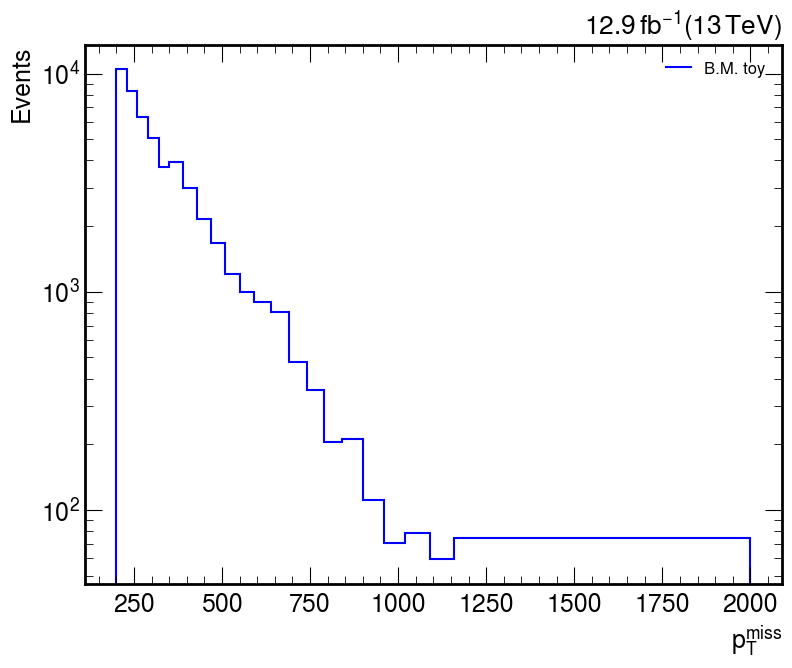

In [25]:
labs_sizes = 18
f, axs = plt.subplots( figsize=(9, 7))
hep.histplot(counts,
             bins = ptmiss,
             ax=axs, 
             histtype= 'step' ,
             #yerr= h1 ** 0.5 * w, 
             color = 'blue',
             label = 'B.M. toy'
            )
#hep.histplot(bm2_counts,
#             bins = binss1,
#             ax=axs, 
#             histtype= 'step' ,
             #yerr= h1 ** 0.5 * w, 
#             color = 'red',
#             label = 'B.M. 2'
#            )

axs.set_xlabel("$p_T^{miss}$", fontsize = labs_sizes)
axs.set_ylabel('Events',fontsize = labs_sizes)
axs.set_yscale("log")
axs.legend(fontsize = labs_sizes - 6 , loc = 'best')
axs.xaxis.set_tick_params(labelsize= labs_sizes)
axs.yaxis.set_tick_params(labelsize= labs_sizes)
axs.set_title(r'$12.9 \,fb^{-1}(13 \,TeV)$', loc = 'right', fontsize = labs_sizes + 1)
plt.savefig("ptmiss_monojet");